In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("../../datasets/ecom-expense/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [60]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City")

In [61]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [62]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [63]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [64]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [65]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [66]:
feature_cols = ["Monthly Income",
                "Transaction Time",
                "Gender_Female",
                "Gender_Male",
                "City_Tier 1",
                "City_Tier 2",
                "City_Tier 3",
                "Record"]

In [67]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [68]:
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
lm.intercept_

-79.41713030136634

In [70]:
lm.coef_

array([ 1.47538980e-01,  1.54946125e-01, -1.31025013e+02,  1.31025013e+02,
        7.67643260e+01,  5.51389743e+01, -1.31903300e+02,  7.72233446e+02])

In [71]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205724),
 ('Transaction Time', 0.15494612549589348),
 ('Gender_Female', -131.0250132555455),
 ('Gender_Male', 131.02501325554587),
 ('City_Tier 1', 76.76432601049547),
 ('City_Tier 2', 55.138974309232296),
 ('City_Tier 3', -131.90330031972775),
 ('Record', 772.2334457445639)]

In [72]:
lm.score(X, Y)

0.9179923586131016

El modelo puede ser escrito como:
* Modelo Global.
    * Total_Spend = -79.41713030136634 + 0.14753898049205724 * Monthly Income + 0.15494612549589348 * Transaction Time - 
      131.0250132555455 * Gender_Female + 131.02501325554587 * Gender_Male + 76.76432601049547 * City_Tier 1 + 
      55.138974309232296 * City_Tier 2 - 131.90330031972775 * City_Tier 3 + 772.2334457445639 * Record
      
* Si es hombre y vive en CT1 (Gender_Male = 1, Gender_Female = 0, City_Tier 1 = 1, City_Tier 2 = 0, City_Tier 3 = 0).
    * Total_Spend = -79.41713030136634 + 0.14753898049205724 * Monthly Income + 0.15494612549589348 * Transaction Time + 
      131.02501325554587 + 76.76432601049547 + 772.2334457445639 * Record
      
* Si es hombre y vive en CT2 (Gender_Male = 1, Gender_Female = 0, City_Tier 1 = 0, City_Tier 2 = 1, City_Tier 3 = 0).
    * Total_Spend = -79.41713030136634 + 0.14753898049205724 * Monthly Income + 0.15494612549589348 * Transaction Time + 
      131.02501325554587 + 55.138974309232296 + 772.2334457445639 * Record
      
* Si es hombre y vive en CT3 (Gender_Male = 1, Gender_Female = 0, City_Tier 1 = 0, City_Tier 2 = 0, City_Tier 3 = 1).
    * Total_Spend = -79.41713030136634 + 0.14753898049205724 * Monthly Income + 0.15494612549589348 * Transaction Time + 
      131.02501325554587 - 131.90330031972775 + 772.2334457445639 * Record
      
* Si es mujser y vive en CT1 (Gender_Male = 0, Gender_Female = 1, City_Tier 1 = 1, City_Tier 2 = 0, City_Tier 3 = 0)
    * Total_Spend = -79.41713030136634 + 0.14753898049205724 * Monthly Income + 0.15494612549589348 * Transaction Time - 
      131.0250132555455 + 76.76432601049547 + 772.2334457445639 * Record
      
* Si es mujer y vive en CT2 (Gender_Male = 0, Gender_Female = 1, City_Tier 1 = 0, City_Tier 2 = 1, City_Tier 3 = 0).
    * Total_Spend = -79.41713030136634 + 0.14753898049205724 * Monthly Income + 0.15494612549589348 * Transaction Time + 
      131.0250132555455 + 55.138974309232296 + 772.2334457445639 * Record
      
* Si es mujer y vive en CT3 (Gender_Male = 0, Gender_Female = 1, City_Tier 1 = 0, City_Tier 2 = 0, City_Tier 3 = 1).
    * Total_Spend = -79.41713030136634 + 0.14753898049205724 * Monthly Income + 0.15494612549589348 * Transaction Time + 
      131.0250132555455 - 131.90330031972775 + 772.2334457445639 * Record

In [5]:
# Si es homre y vive en City_Tier 1.
# Se suman los coeficientes independientes.
-79.41713030136634 + 131.02501325554587 + 76.76432601049547

128.372208964675

In [80]:
df_new["prediction"] = (-79.41713030136634 + 
                        (0.14753898049205724 * df_new["Monthly Income"]) + 
                        (0.15494612549589348 * df_new["Transaction Time"]) - 
                        (131.0250132555455 * df_new["Gender_Female"]) + 
                        (131.02501325554587 * df_new["Gender_Male"]) +
                        (76.76432601049547 * df_new["City_Tier 1"]) + 
                        (55.138974309232296 * df_new["City_Tier 2"]) - 
                        (131.90330031972775 * df_new["City_Tier 3"]) + 
                        (772.2334457445639 * df_new["Record"]))

In [83]:
   df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [85]:
SSD = sum((df_new["prediction"] - df_new["Total Spend"]) ** 2)
SSD

1517733985.3408136

In [86]:
RSE = np.sqrt(SSD / len(df_new) - len(feature_cols) - 1)
RSE

801.5947080211575

In [87]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976715

In [88]:
error = RSE / sales_mean
error

0.1300619443479169

## Eliminar variables dummy redundantes.

In [14]:
dummy_gender = pd.get_dummies(df["Gender"], prefix = "Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [19]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix = "City").iloc[:,1:]
dummy_city_tier.head()


,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [24]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [26]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
feature_cols

['Monthly Income',
 'Transaction Time',
 'Gender_Male',
 'City_Tier 2',
 'City_Tier 3',
 'Record']

In [27]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
lm.intercept_

-133.6778175464151

In [29]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205724),
 ('Transaction Time', 0.15494612549589926),
 ('Gender_Male', 262.05002651109345),
 ('City_Tier 2', -21.625351701264158),
 ('City_Tier 3', -208.6676263302229),
 ('Record', 772.233445744563)]

In [30]:
lm.score(X, Y)

0.9179923586131016

### Coeficientes con todas las variables en el modelo.
* [('Monthly Income', 0.14753898049205724),
* ('Transaction Time', 0.15494612549589348),
* ('Gender_Female', -131.0250132555455),
* ('Gender_Male', 131.02501325554587),
* ('City_Tier 1', 76.76432601049547),
* ('City_Tier 2', 55.138974309232296),
* ('City_Tier 3', -131.90330031972775),
* ('Record', 772.2334457445639)]
 
### Coeficientes tras enmascarar las variables dummy pertinentes.
* [('Monthly Income', 0.14753898049205724),
* ('Transaction Time', 0.15494612549589926),
* ('Gender_Male', 262.05002651109345),
* ('City_Tier 2', -21.625351701264158),
* ('City_Tier 3', -208.6676263302229),
* ('Record', 772.233445744563)]

### Los cambios se reflejan en:
* Gender_Male     
    * antes -> 131.025, 
    * después -> 262.050 = (131.025 - (-131.025)
* Gender_Female   
    * antes -> -131.025, 
    * después -> 0
* CT1             
    * antes -> 76.764, 
    * después -> 0
* CT2             
    * antes -> 55.138, 
    * después -> -21.625 = (55.138 - 76.764)
* CT3             
    * antes -> -131.903, 
    * después -> -208.667 = (-131.903 - 76.764)

# Transformación de variables para conseguir una relación no lineal.

In [32]:
data_auto = pd.read_csv("../../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [33]:
data_auto.shape

(406, 9)

Text(0.5, 1.0, 'CV vs MPG')

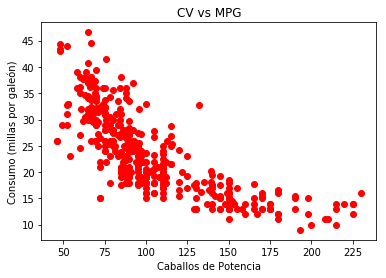

In [38]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón)")
plt.title("CV vs MPG")

# Modelo de regresión lineal.
    * mpg = a + b * horsepower

In [56]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

In [57]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
type(X)

pandas.core.series.Series

In [58]:
type(X_data)

numpy.ndarray

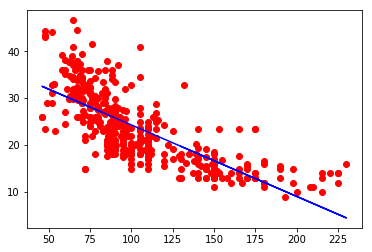

In [59]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X_data), color = "blue")

In [60]:
lm.score(X_data, Y)

0.5746533406450252

In [61]:
SSD = sum((Y - lm.predict(X_data)) ** 2)
SSD

10315.75196006092

In [62]:
RSE = np.sqrt(SSD / len(X_data) - 1)
RSE

4.940471238582748

In [67]:
y_mean = np.mean(Y)
error = RSE / y_mean * 100
error

21.010252948625183

In [68]:
(SSD, RSE, y_mean, error)

(10315.75196006092, 4.940471238582748, 23.514572864321607, 21.010252948625183)

# Modelo de regresión cuadrático.
    * mpg = a + b * horsepower ^ 2

In [69]:
X_data = X ** 2
X_data = X_data[:, np.newaxis]

In [70]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
lm.score(X_data, Y)

0.4849887034823205

In [73]:
SSD = sum((Y - lm.predict(X_data)) ** 2)
SSD

12490.350340501933

In [74]:
RSE = np.sqrt(SSD / len(X_data) - 1)
RSE

5.455676832957556

In [75]:
y_mean = np.mean(Y)
error = RSE / y_mean * 100
error

23.201258489519034

In [76]:
(SSD, RSE, y_mean, error)

(12490.350340501933, 5.455676832957556, 23.514572864321607, 23.201258489519034)

# Modelo de regresión cuadrático.
    * mpg = a + b * horsepower + c * horsepower ^2

In [78]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [79]:
poly = PolynomialFeatures(degree = 2)

In [80]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [81]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
lm.score(X_data, Y)

0.6439066584257469

In [85]:
lm.intercept_

55.02619244708123

In [86]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

### El modelo resultante sería:
mpg = 55.02619244708123 - -0.43404318 * horsepower + 0.00112615 * horsepower ^ 2

In [108]:
for d in range(2, 5):
    poly = PolynomialFeatures(degree = d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado " + str(d))
    print(lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data, Y, lm.predict(X_data))

Regresión de grado 2
0.6439066584257469
55.02619244708123
[ 0.         -0.43404318  0.00112615]
  SSD:   8636.180643524505   RSE:   4.502375028291241   y_mean:   23.514572864321607   error:   19.147169094968522%
Regresión de grado 3
0.6444678885560742
58.44877411148398
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
  SSD:   8622.56936742855   RSE:   4.498650418158693   y_mean:   23.514572864321607   error:   19.131329512620848%
Regresión de grado 4
0.6467674189704501
40.096643856249585
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
  SSD:   8566.799832491353   RSE:   4.4833572463338855   y_mean:   23.514572864321607   error:   19.066292516571426%


In [105]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = sum((Y - Y_pred) ** 2)
    RSE = np.sqrt(SSD / len(X_data) - 1)
    y_mean = np.mean(Y)
    error = RSE / y_mean * 100
    print("  SSD:   " + str(SSD), "  RSE:   " + str(RSE), "  y_mean:   " + str(y_mean), "  error:   " + str(error)+ "%")

# El problema de los uotliers.

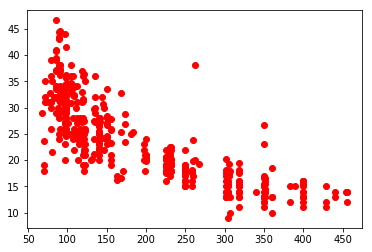

In [111]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [114]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
lm.score(X, Y)

0.6261049762826918

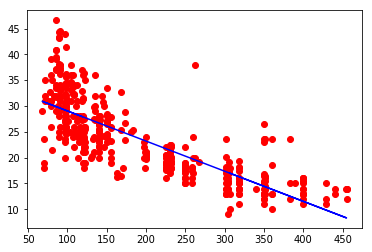

In [117]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color = "blue")

In [122]:
data_auto[(data_auto["displacement"] > 250) & (data_auto["mpg"] > 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [131]:
data_auto[(data_auto["displacement"] > 300) & (data_auto["mpg"] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [132]:
data_auto_clean = data_auto.drop([395, 305, 258, 372])

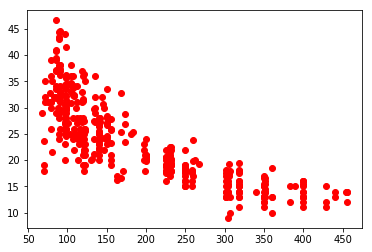

In [133]:
%matplotlib inline
plt.plot(data_auto_clean["displacement"], data_auto_clean["mpg"], "ro")

In [134]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [135]:
lm.score(X, Y)

0.6466514317531822

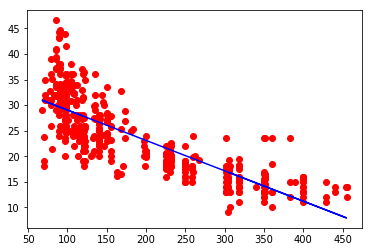

In [136]:
%matplotlib inline
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color = "blue")